In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import math
import matplotlib.dates as mdate
import numpy as np
import datetime as dt
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns

# final df

In [2]:
df = pd.read_csv('entsoe2015-2023.csv', index_col=0)
df = df.rename_axis('Date')
#print(df)

                     IT_GR  IT_NORD_AT  IT_NORD_CH  IT_NORD_FR  IT_NORD_SI  \
Date                                                                         
2015-01-01 00:00:00    NaN         NaN         NaN         NaN         NaN   
2015-01-01 01:00:00    NaN         NaN         NaN         NaN         NaN   
2015-01-01 02:00:00    NaN         NaN         NaN         NaN         NaN   
2015-01-01 03:00:00    NaN         NaN         NaN         NaN         NaN   
2015-01-01 04:00:00    NaN         NaN         NaN         NaN         NaN   
...                    ...         ...         ...         ...         ...   
2023-12-30 20:00:00    NaN         NaN         NaN         NaN         NaN   
2023-12-30 21:00:00    NaN         NaN         NaN         NaN         NaN   
2023-12-30 22:00:00    NaN         NaN         NaN         NaN         NaN   
2023-12-30 23:00:00    NaN         NaN         NaN         NaN         NaN   
2023-12-31 00:00:00    NaN         NaN         NaN         NaN  

Until 2018, the energy price market had a joint trading zone between Austria, Germany and Luxembourg. After 2018, a separate market appeared in Austria. So we need to merge the columns for them.

In [187]:
df.index = pd.to_datetime(df.index)
df['Year'] = df.index.year
df['Combined_AT_DE_AT_LU'] = df.apply(lambda row: row['DE_AT_LU'] if row['Year'] <= 2018 else row['AT'], axis=1)
df['Combined_DE_LU_DE_AT_LU'] = df.apply(lambda row: row['DE_AT_LU'] if row['Year'] <= 2018 else row['DE_LU'], axis=1)

In [188]:
exclude_columns = ['DE_AT_LU', 'AT', 'DE_LU', 'Year']
df.drop(columns=exclude_columns, inplace=True)
#print(df)

                     IT_GR  IT_NORD_AT  IT_NORD_CH  IT_NORD_FR  IT_NORD_SI  \
Date                                                                         
2015-01-01 00:00:00    NaN         NaN         NaN         NaN         NaN   
2015-01-01 01:00:00    NaN         NaN         NaN         NaN         NaN   
2015-01-01 02:00:00    NaN         NaN         NaN         NaN         NaN   
2015-01-01 03:00:00    NaN         NaN         NaN         NaN         NaN   
2015-01-01 04:00:00    NaN         NaN         NaN         NaN         NaN   
...                    ...         ...         ...         ...         ...   
2023-12-30 20:00:00    NaN         NaN         NaN         NaN         NaN   
2023-12-30 21:00:00    NaN         NaN         NaN         NaN         NaN   
2023-12-30 22:00:00    NaN         NaN         NaN         NaN         NaN   
2023-12-30 23:00:00    NaN         NaN         NaN         NaN         NaN   
2023-12-31 00:00:00    NaN         NaN         NaN         NaN  

In [189]:
df.describe()

,IT_GR,IT_NORD_AT,IT_NORD_CH,IT_NORD_FR,IT_NORD_SI,IT_SACO_AC,IT_SACO_DC,RS,EE,FI,...,IT_CNOR,IT_CSUD,IT_NORD,IT_SARD,IT_SICI,DK_1,DK_2,GB,Combined_AT_DE_AT_LU,Combined_DE_LU_DE_AT_LU
count,25535.000000,25584.000000,25535.000000,25584.000000,25584.000000,78769.000000,78745.000000,61537.000000,78865.000000,78865.000000,...,78769.000000,78769.000000,78769.000000,78769.000000,78769.000000,78865.000000,78865.000000,52535.000000,76560.000000,76560.000000
mean,46.212678,49.597525,49.611203,49.597525,49.597525,92.274207,233.942089,97.255194,66.013046,55.203629,...,95.745074,94.187325,95.611601,92.169474,99.407151,64.561791,64.387389,43.579257,76.614231,71.124842
std,13.413009,16.570927,16.581585,16.570927,16.570927,93.767176,541.731988,98.837519,74.434402,65.926540,...,98.895820,95.737108,98.929620,93.296439,93.805040,82.122452,81.029469,18.971679,92.211668,86.760863
min,0.000000,5.000000,5.000000,5.000000,5.000000,0.000000,0.000000,0.000000,-60.040000,-500.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-440.100000,-60.040000,-38.800000,-500.000000,-500.000000
25%,38.100000,39.040000,39.050000,39.040000,39.040000,43.130000,45.050000,41.060000,29.670000,25.980000,...,43.710000,43.690000,43.460000,43.130000,47.480000,25.060000,25.970000,33.955000,29.930000,28.920000
50%,45.030000,47.460000,47.490000,47.460000,47.460000,56.200000,60.610000,59.920000,42.190000,37.680000,...,57.510000,56.710000,57.530000,56.200000,64.790000,37.260000,38.320000,41.200000,42.010000,40.690000
75%,52.260000,56.300000,56.320000,56.300000,56.300000,100.000000,129.010000,110.380000,69.310000,55.450000,...,103.080000,102.600000,102.910000,100.000000,112.000000,67.280000,64.050000,50.660000,83.340000,76.610000
max,150.000000,206.120000,206.120000,206.120000,206.120000,1000.000000,3000.000000,889.520000,4000.000000,1000.070000,...,871.000000,870.000000,871.000000,871.000000,870.000000,871.000000,871.000000,999.000000,919.640000,871.000000


# Handling missing values

In [190]:
# df.dropna(inplace=True)
# print(df)

We cant drop missing values because we end up with nothing.

In [191]:
# Overall missing values
total_missing = df.isnull().sum().sum()
print(f"Total missing values in the dataset: {total_missing}")

Total missing values in the dataset: 639544


In [192]:
# Missing values per column
missing_per_column = df.isnull().sum()
print(missing_per_column)

IT_GR                      53330
IT_NORD_AT                 53281
IT_NORD_CH                 53330
IT_NORD_FR                 53281
IT_NORD_SI                 53281
IT_SACO_AC                    96
IT_SACO_DC                   120
RS                         17328
EE                             0
FI                             0
LV                             0
SE_1                           0
SE_2                           0
SE_3                           0
SE_4                           0
NO_1                           0
NO_3                           0
NO_4                           0
NO_5                           0
IT_BRNN                    43897
IT_FOGN                    43921
IT_PRGP                    43897
IT_SUD                        96
MK                         73247
NL                            96
NO_2                           0
PL                          4590
PT                            48
RO                           120
SI                             0
SK        

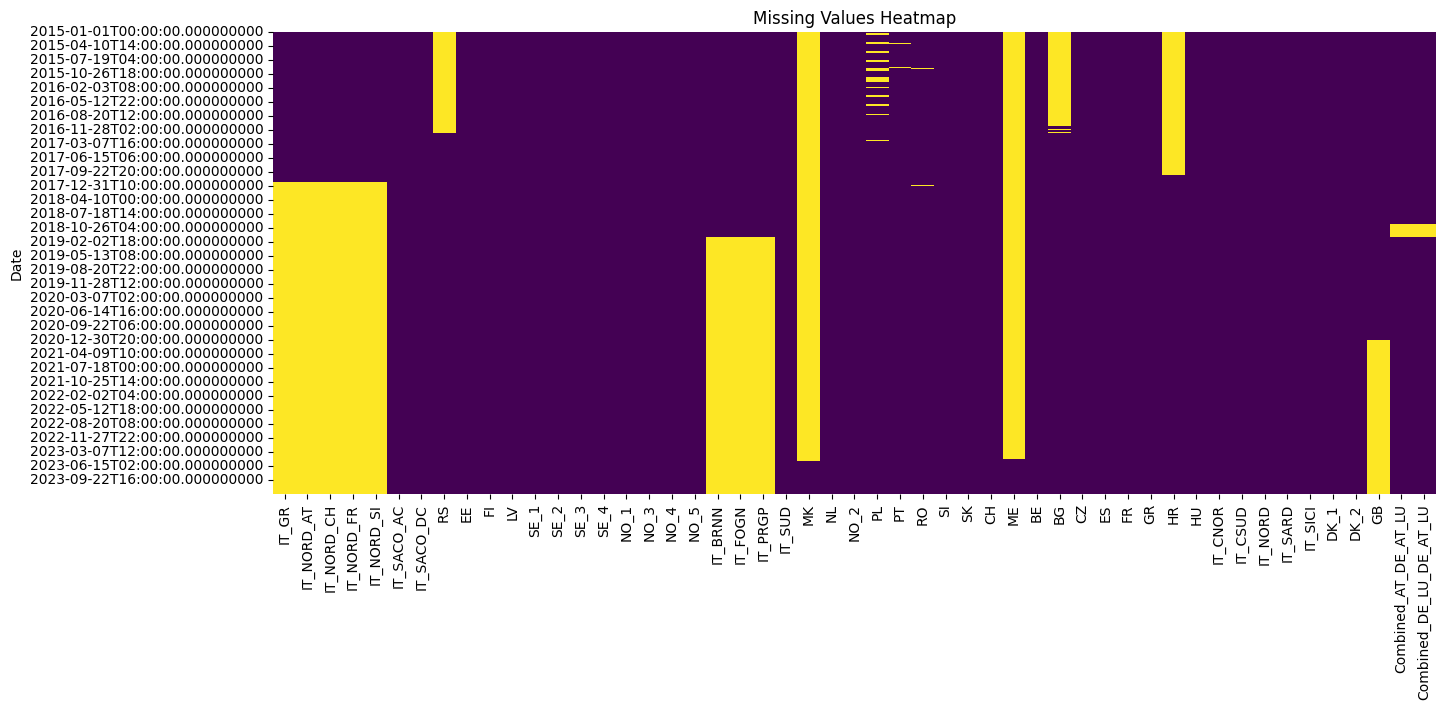

In [193]:
# Heatmap of missing values
plt.figure(figsize=(15, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

Normalize the Data
